# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [667]:
# Dependencies and Setup
# %matplotlib qt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import grequests
import time
from scipy.stats import linregress
import traceback
import json
import os
import mplcursors
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [668]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [669]:
# Set the API base URL https://api.weatherstack.com/current? access_key = YOUR_ACCESS_KEY   & query = New York
# https://api.openweathermap.org/data/2.5/weather?q=London&appid={API key}

baseUrl = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
cities = cities[:60] # test with 80 cities while developing the code
uList = [baseUrl + c + "&units=metric&appid=" + weather_api_key for c in cities ]

# Loop through all the cities in our list to fetch weather data
#using grequests
allRes = (grequests.get(url) for url in uList)
responses = grequests.map(allRes)
record_number = 0
for i, res in enumerate(responses):
    resDict = json.loads(res.text)
    try:
        workingCity = resDict['name']
        city_lat = resDict['coord']['lat']
        city_lng = resDict['coord']['lon']
        city_max_temp = resDict['main']['temp_max']
        city_humidity = resDict['main']['humidity']
        city_clouds = resDict['clouds']['all']
        city_wind = resDict['wind']['speed']
        city_country = resDict['sys']['country']
        city_date = resDict['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        workingCity = cities[i]
        print(f"City {cities[i]} not found, skipping it")
        continue
    # Group cities in sets of 50 for logging purposes
    if (record_number % 50 == 0 and record_number >= 50):
        set_count += 1
        record_number = 0
    record_number +=1
    print("Processing Record %s of Set %s | %s" % (record_number, set_count, workingCity))
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

''' 
Method above uses grequests that makes asynchronous calls and takes ~ 10 seconds
Method below with the library requests making one api call at a time takes ~ 10 minutes
'''
#using requests
# for i, city in enumerate(cities):
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url = baseUrl + city + "&units=metric&appid=" + weather_api_key
    
#     # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
#     record_count += 1

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#         res = requests.get(city_url)
#         city_weather = json.loads(res.text)

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = city_weather['coord']['lat']
#         city_lng = city_weather['coord']['lon']
#         city_max_temp = city_weather['main']['temp_max']
#         city_humidity = city_weather['main']['humidity']
#         city_clouds = city_weather['clouds']['all']
#         city_wind = city_weather['wind']['speed']
#         city_country = city_weather['sys']['country']
#         city_date = city_weather['dt']

#         # Append the City information into city_data list
#         city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city
#     except:
#         print(f"City {city} not found. Skipping...")
#         continue
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Omboué
Processing Record 2 of Set 1 | Korla
Processing Record 3 of Set 1 | Khani
Processing Record 4 of Set 1 | George Town
Processing Record 5 of Set 1 | Esperance
Processing Record 6 of Set 1 | Hong Kong
Processing Record 7 of Set 1 | Kununurra
Processing Record 8 of Set 1 | Olinda
Processing Record 9 of Set 1 | Muros
Processing Record 10 of Set 1 | Sawtell
Processing Record 11 of Set 1 | Ponta Delgada
Processing Record 12 of Set 1 | Karratha
Processing Record 13 of Set 1 | Fortuna
Processing Record 14 of Set 1 | Kabare
City satitoa not found, skipping it
Processing Record 15 of Set 1 | Jamestown
City sentyabrskiy not found, skipping it
Processing Record 16 of Set 1 | Barrow
Processing Record 17 of Set 1 | Ushuaia
Processing Record 18 of Set 1 | Tevaitoa
Processing Record 19 of Set 1 | Saldanha
Processing Record 20 of Set 1 | Mackay
Processing Record 21 of Set 1 | San Andrés del Rabanedo
Proces

' \nMethod above uses grequests that makes asynchronous calls and takes ~ 10 seconds\nMethod below with the library requests making one api call at a time takes ~ 10 minutes\n'

In [670]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          53
Lat           53
Lng           53
Max Temp      53
Humidity      53
Cloudiness    53
Wind Speed    53
Country       53
Date          53
dtype: int64

c:\Users\Gus Bustillos\AppData\Local\Programs\Python\Python39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [671]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gizo,-1.5746,9.2618,25.69,86,98,2.16,GA,1679357456
1,gizo,41.7597,86.1469,4.46,46,16,3.31,CN,1679357456
2,gizo,41.9563,42.9566,3.76,99,100,1.25,GE,1679357456
3,gizo,5.4112,100.3354,25.96,89,20,0.00,MY,1679357456
4,gizo,-33.8667,121.9000,19.66,71,32,6.95,AU,1679357456


c:\Users\Gus Bustillos\AppData\Local\Programs\Python\Python39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [672]:
# Export the City_Data into a csv
destPath = os.path.abspath(os.getcwd() + "/output_data/") # assign destination path
if not os.path.exists(destPath): # Check if destination location exists, else create it
    os.makedirs(destPath)

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [673]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gizo,-1.5746,9.2618,25.69,86,98,2.16,GA,1679357456
1,gizo,41.7597,86.1469,4.46,46,16,3.31,CN,1679357456
2,gizo,41.9563,42.9566,3.76,99,100,1.25,GE,1679357456
3,gizo,5.4112,100.3354,25.96,89,20,0.00,MY,1679357456
4,gizo,-33.8667,121.9000,19.66,71,32,6.95,AU,1679357456


c:\Users\Gus Bustillos\AppData\Local\Programs\Python\Python39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

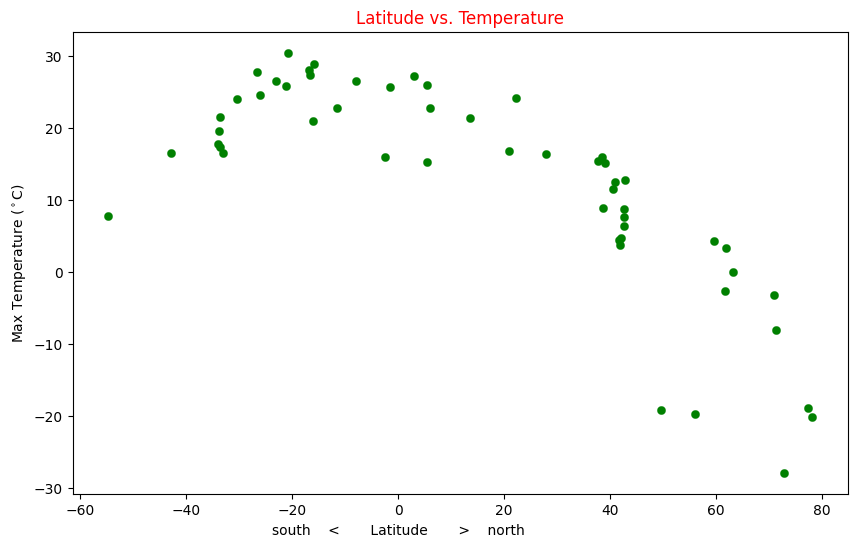

In [674]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.figure(figsize=(10,6))
try:    
    plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],linewidths = .2, color='g', marker ="o")
except:
    print("LOOKS LIKE OUR API LIMIT WAS REACHED... WAIT A DAY")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('south    <       Latitude       >    north                            ')
plt.ylabel('Max Temperature ($^\circ$C)')
plt.title('Latitude vs. Temperature')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

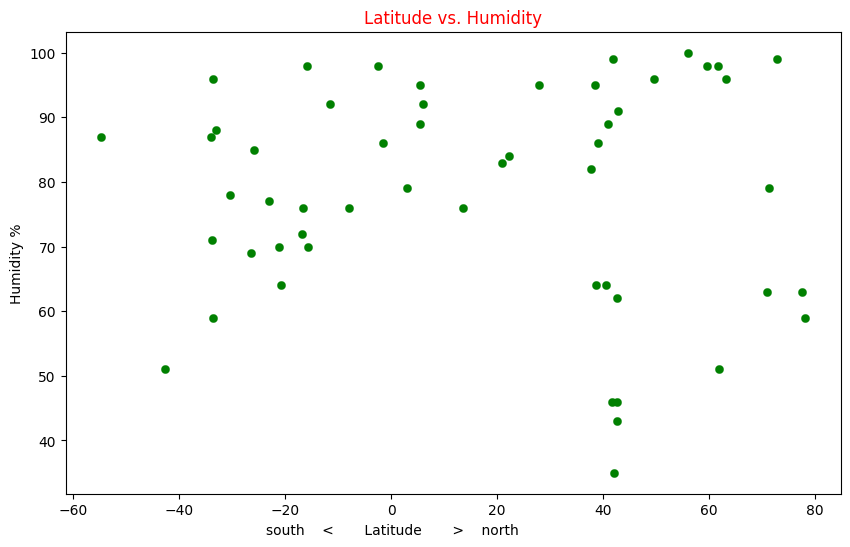

In [675]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
# fig = plt.figure()
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],linewidths = .2, color='g', marker ="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('south    <       Latitude       >    north                            ')
plt.ylabel('Humidity %')
plt.title('Latitude vs. Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

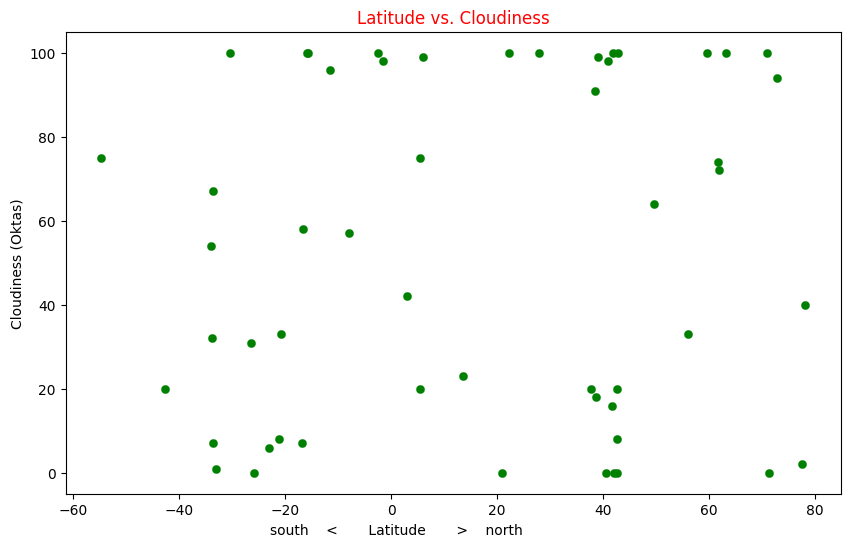

In [676]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],linewidths = .2, color='g', marker ="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('south    <       Latitude       >    north                          ')
plt.ylabel('Cloudiness (Oktas)')
plt.title('Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
# city_data_df
plt.show()

#### Latitude vs. Wind Speed Plot

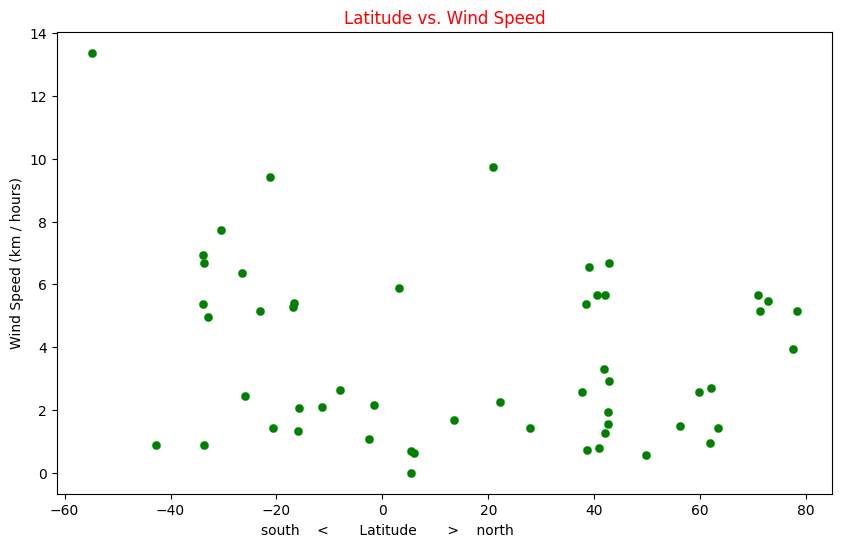

In [677]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],linewidths = .2, color='g', marker ="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('south    <       Latitude       >    north                          ')
plt.ylabel('Wind Speed (km / hours)')
plt.title('Latitude vs. Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()
# city_data_df

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [701]:
# Define a function to create Linear Regression plots
def linearRegressionPlot(df_x_axis, df_y_axis, xlable, ylabel):
    scipy_linear_model = linregress(df_x_axis, df_y_axis) # scipy_linear_model
    rvalue = scipy_linear_model[2]
    text =   "   y = " +  str(round(scipy_linear_model[0], 2)) + "x  + " + str(round(scipy_linear_model[1], 2))
    # print(scipy_linear_model)
    y_axiz = df_x_axis * scipy_linear_model[0] + scipy_linear_model[1]  # use slope and intercept from scipy_linear_model
    plt.scatter(df_x_axis, df_y_axis)
    plt.plot(df_x_axis, y_axiz ,color="g")
    plt.xlabel(str(xlable))
    plt.ylabel(ylabel)
    plt.title("The r-value = " + str(rvalue) + "  " + text)
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams.update({'text.color': "red"})
    # plt.text(2, 40, "The r-value = " + str(rvalue) + "  " + text, fontsize = 12)
    return(plt)
# YOUR CODE HERE

In [702]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >  0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gizo,41.7597,86.1469,4.46,46,16,3.31,CN,1679357456
2,gizo,41.9563,42.9566,3.76,99,100,1.25,GE,1679357456
3,gizo,5.4112,100.3354,25.96,89,20,0.00,MY,1679357456
5,gizo,22.2855,114.1577,24.13,84,100,2.24,HK,1679357180
8,gizo,42.7762,-9.0603,12.83,91,100,2.93,ES,1679357456


c:\Users\Gus Bustillos\AppData\Local\Programs\Python\Python39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [703]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <  0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gizo,-1.5746,9.2618,25.69,86,98,2.16,GA,1679357456
4,gizo,-33.8667,121.9000,19.66,71,32,6.95,AU,1679357456
6,gizo,-15.7667,128.7333,28.99,70,100,2.06,AU,1679357456
7,gizo,-8.0089,-34.8553,26.62,76,57,2.62,BR,1679357456
9,gizo,-30.3833,153.1000,24.01,78,100,7.72,AU,1679357456


c:\Users\Gus Bustillos\AppData\Local\Programs\Python\Python39\lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


###  Temperature vs. Latitude Linear Regression Plot

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

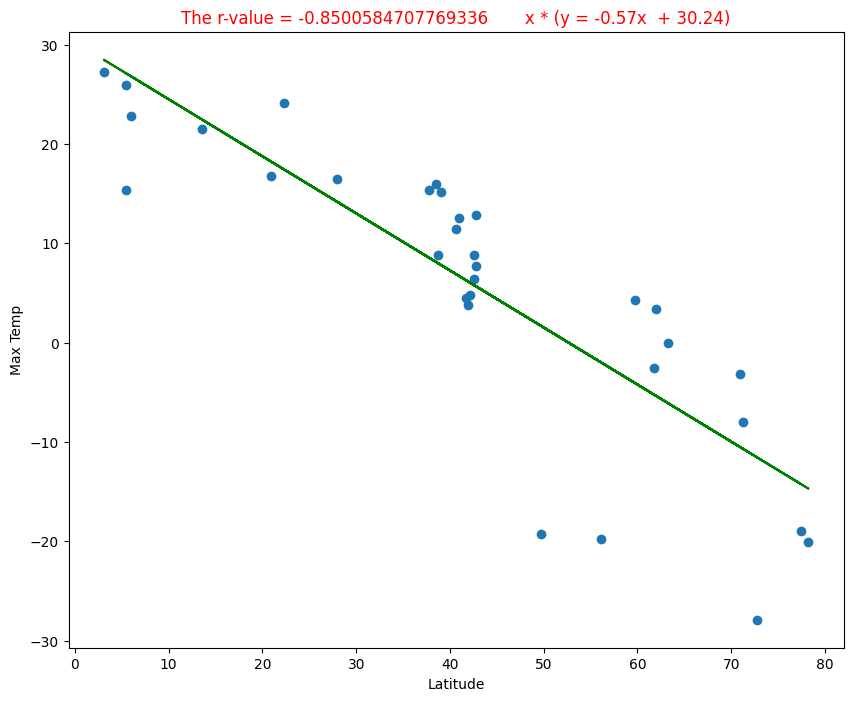

In [704]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# scipy_linear_model = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp']) # scipy_linear_model
# print(scipy_linear_model)
# y_axiz = northern_hemi_df['Lat'] * scipy_linear_model[0] + scipy_linear_model[1]  # use slope and intercept from scipy_linear_model
# print(y_axiz)
linearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

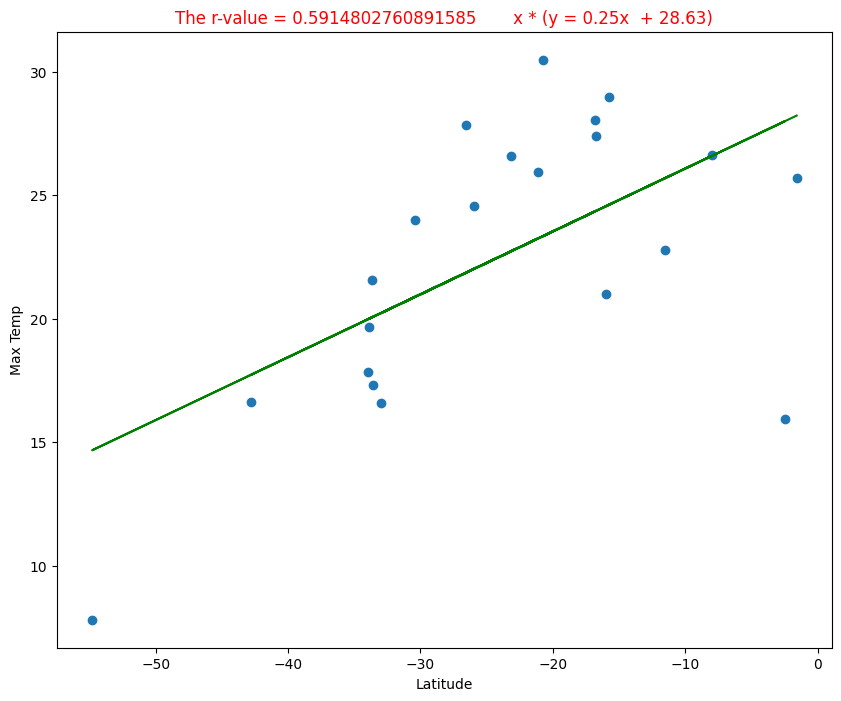

In [705]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

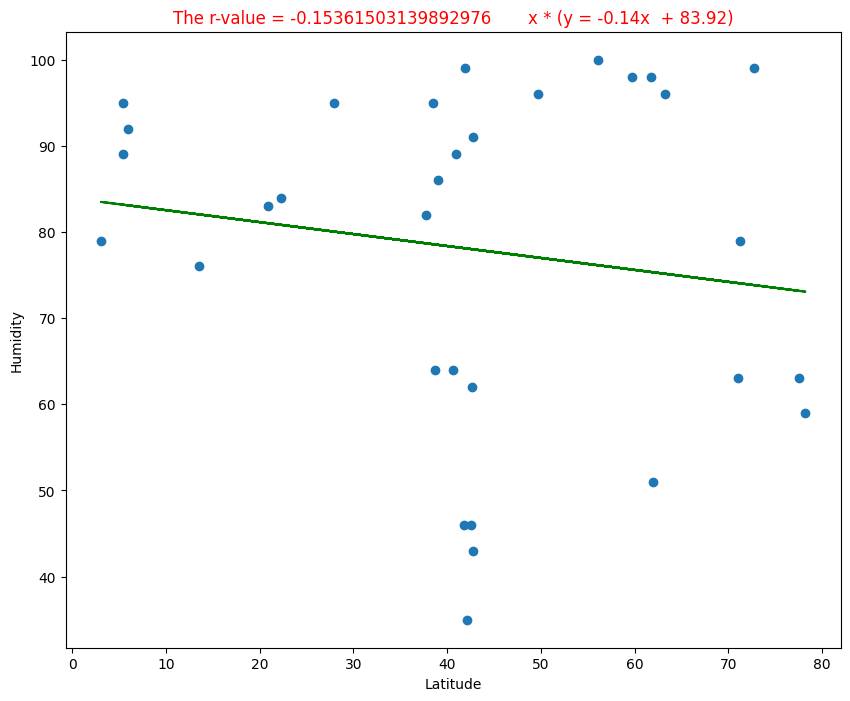

In [706]:
# Northern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

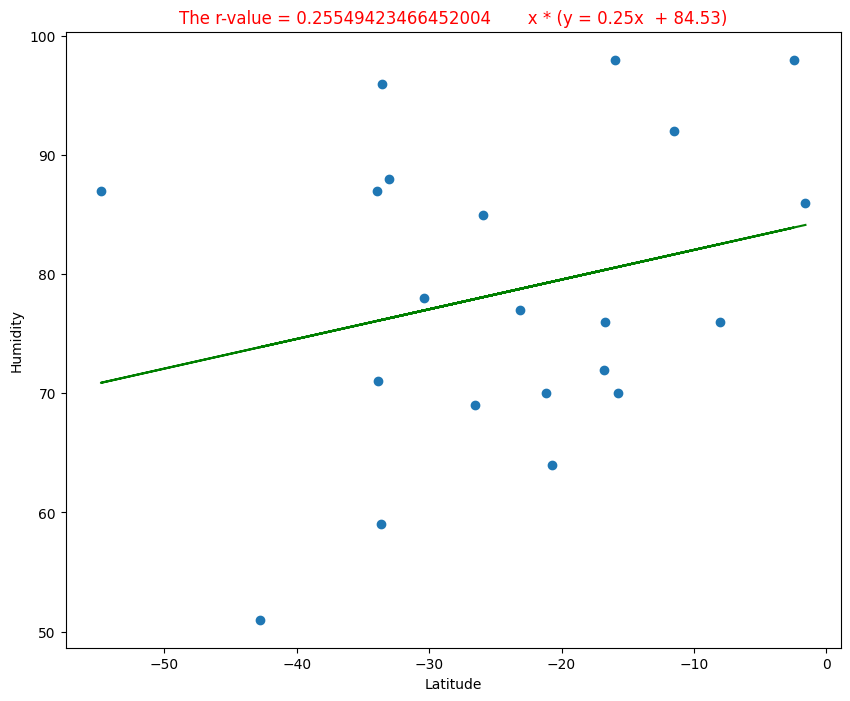

In [707]:
# Southern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

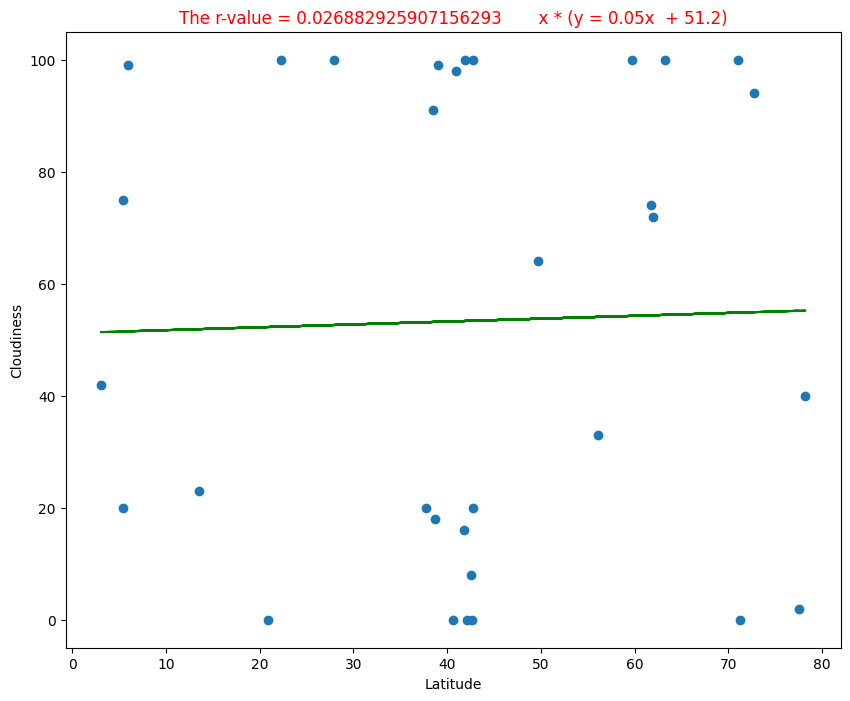

In [708]:
# Northern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

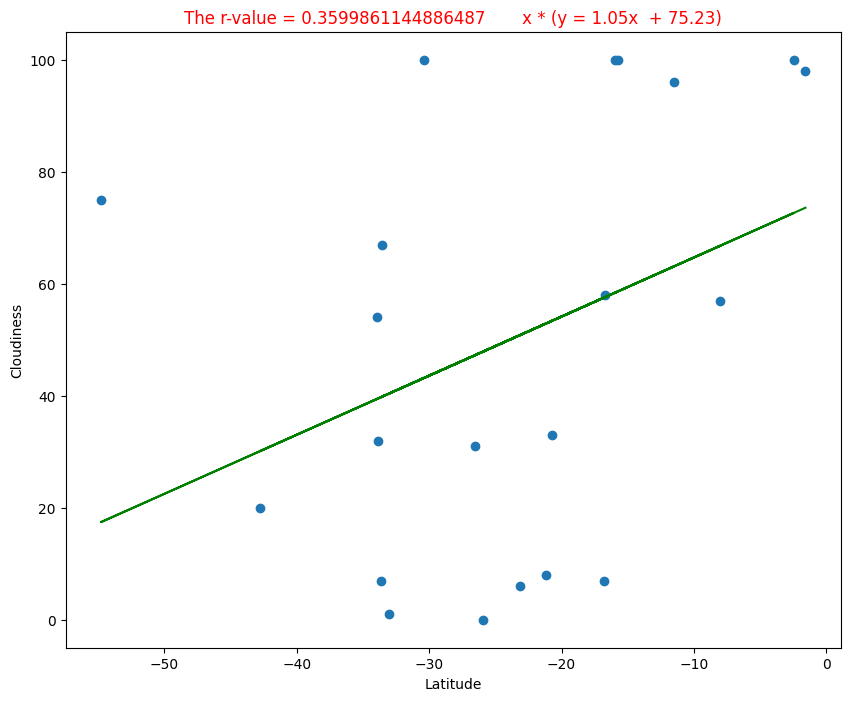

In [709]:
# Southern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

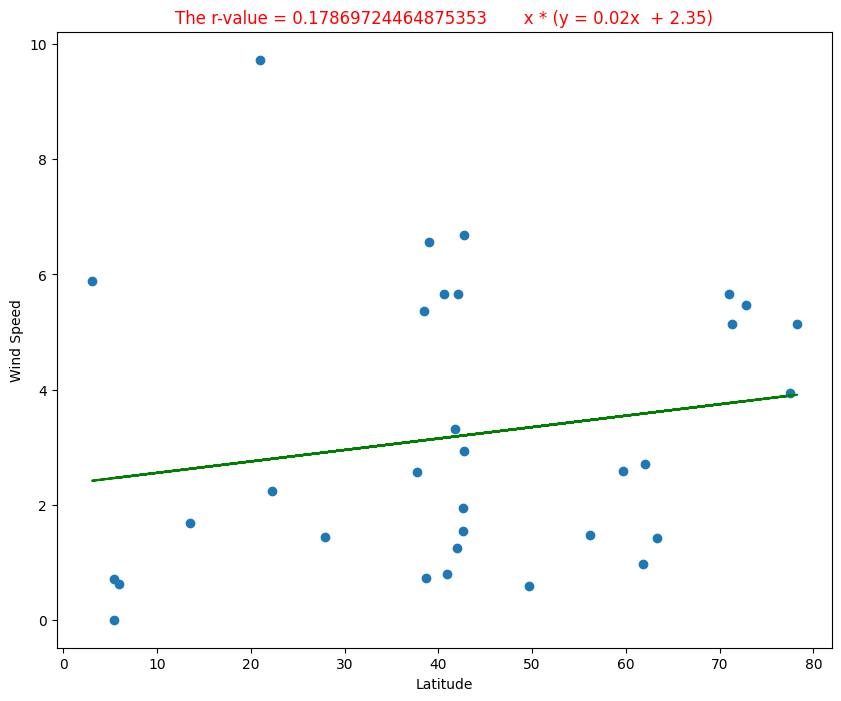

In [710]:
# Northern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

<module 'matplotlib.pyplot' from 'c:\\Users\\Gus Bustillos\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

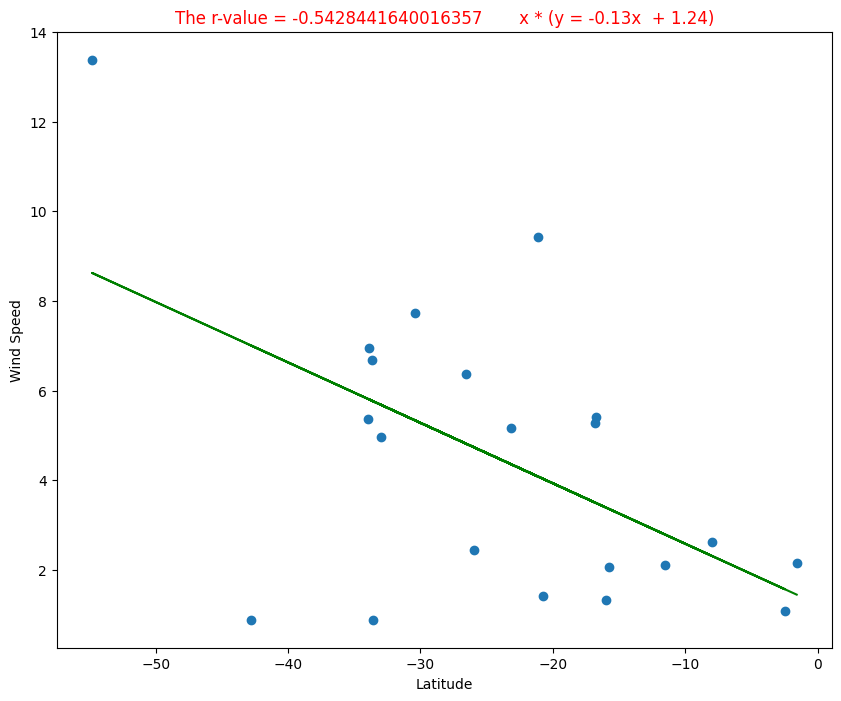

In [711]:
# Southern Hemisphere
# YOUR CODE HERE
linearRegressionPlot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** 
I've learned that we have an independent variable that is represented on teh X axis and a depended variable (y-axis) 
The linear relationship direction will be determined by the results, if the results show more of the dependent varible as there is more of the dependent varialbe, 
the data would represent a positive linear relationship, but if the dependent variable is less the more the independent variable the relationship is negative. 
The data above shows that 